In [1]:
#importing libraries
import numpy as np
import pandas as pd
import warnings


In [2]:
#to ignore all warnings 
warnings.filterwarnings('ignore')

# get data

In [5]:

columns=['userid','itemid','rating','timestamp']
df=pd.read_csv("/Users/nihalpandey/Desktop/project/dataset/u.data", names=columns,sep='\t')

In [6]:
df.head()

,userid,itemid,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [7]:
df.shape

(100000, 4)

In [8]:
ditem=pd.read_csv("/Users/nihalpandey/Desktop/project/dataset/u.item",sep='\|',header=None)

In [9]:
ditem.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
ditem.shape

(1682, 24)

In [11]:
ditem=ditem[[0,1]]

In [12]:
ditem.columns=['itemid','title']

In [13]:
ditem.head()

,itemid,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [14]:
data=pd.merge(df,ditem,on='itemid')

# eda

In [15]:
import matplotlib.pyplot as plt
import seaborn as snb

In [16]:
data.groupby('title').mean()['rating'].sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [17]:
data.groupby('title').count()['rating'].sort_values(ascending=False).head()

title
Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [18]:
rating=pd.DataFrame(data.groupby('title').mean()['rating'])

In [19]:
rating.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [20]:
rating['no of people gives rating']=pd.DataFrame(data.groupby('title').count()['rating'])

In [21]:
rating.head()

,rating,no of people gives rating
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


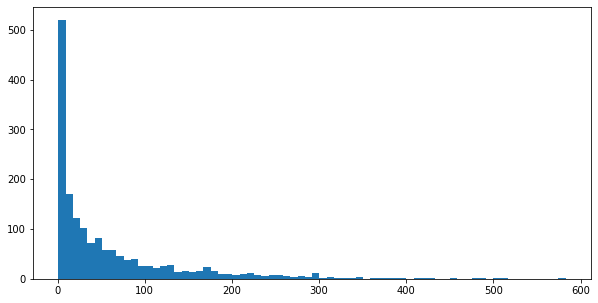

In [22]:
plt.figure(figsize=(10,5))
plt.hist(rating['no of people gives rating'],bins=70)
plt.show()

In [ ]:
plt.hist(rating['rating'],bins=70)
plt.show()

In [ ]:
snb.jointplot(x='rating' ,y='no of people gives rating' ,data=rating)

# create model

In [23]:
data.head()

,userid,itemid,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [24]:
moviemat=pd.pivot_table(data,index='userid',columns='title',values='rating')

In [25]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,� k�ldum klaka (Cold Fever) (1994)
userid,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [26]:
#those who rated star wars movie
starrate=moviemat['Star Wars (1977)']
starrate.head()

userid
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [29]:
#similarity score of other movies with star wars
similarity=pd.DataFrame(moviemat.corrwith(starrate),columns=['coorelation'])

In [30]:
similarity.head()

,coorelation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [35]:
similarity.dropna(inplace=True)

In [48]:
similarity.sort_values('coorelation',ascending=False).head()

,coorelation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0


In [49]:
rating

,rating,no of people gives rating
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [56]:
final=similarity.join(rating['no of people gives rating'])

In [57]:
final.head()
final.shape

(1410, 2)

In [58]:
final[final['no of people gives rating']>100].sort_values('coorelation',ascending=False)

,coorelation,no of people gives rating
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


In [59]:
#build a function that takes movie name as input and give output
def predict(movie):
    starrate=moviemat[movie]
    similarity=pd.DataFrame(moviemat.corrwith(starrate),columns=['coorelation'])
    similarity.dropna(inplace=True)
    final=similarity.join(rating['no of people gives rating'])
    pre=final[final['no of people gives rating']>100].sort_values('coorelation',ascending=False)
    return pre
    

In [60]:
prediction=predict('Titanic (1997)')

In [62]:
prediction.head()

,coorelation,no of people gives rating
title,,
Titanic (1997),1.000000,350
"River Wild, The (1994)",0.497600,146
"Abyss, The (1989)",0.472103,151
Bram Stoker's Dracula (1992),0.443560,120
True Lies (1994),0.435104,208
